In [1]:
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
import numpy as np
from scipy.special import binom

In [3]:
traj=[]
with open('./heaps_cose_lenin/book_trajectories.dat','r') as f:
    for i in f.readlines():
        traj.append(map(int,i.rstrip().split('\t')))


In [4]:
len(traj)

1000

(99995, 100005)

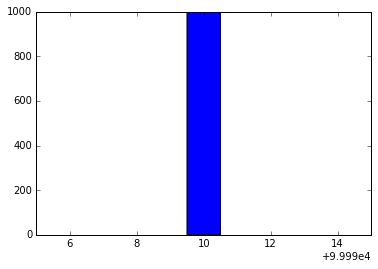

In [5]:
plt.hist(map(len,traj),1);
plt.xlim((100000-5,100000+5))

In [6]:
np.unique(map(len,traj))

array([100000])

In [7]:
abund=[]
with open('./heaps_cose_lenin/book_abundances.dat','r') as f:
    for i in f.readlines():
        abund.append(map(int,i.rstrip().split('\t')))


In [8]:
len(abund)

1000

In [9]:
abund[0][:10]

[937, 462, 253, 43, 155, 36, 370, 52, 150, 28]

In [10]:
sort_ab=map(lambda x: sorted(x,reverse=True),abund)

In [11]:
sort_ab[0][:10]

[1618, 1502, 1404, 1372, 1072, 982, 970, 937, 904, 870]

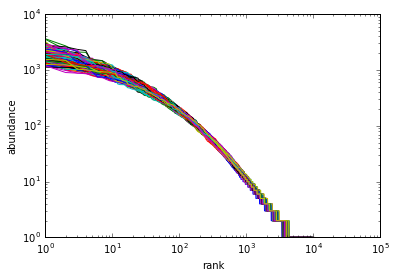

In [12]:
for i in sort_ab[:300]: 
    plt.plot(i)
#plt.xlim((10**3,2*10**4))
#plt.ylim((10**-1,10**2))
plt.xlabel('rank')
plt.ylabel('abundance')
plt.plot()
plt.loglog()
plt.show()

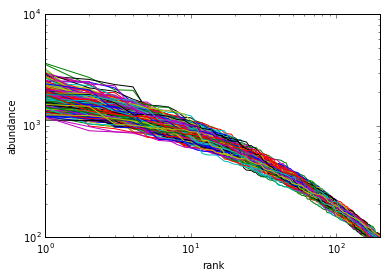

In [142]:
for i in sort_ab[:300]: 
    plt.plot(i)
plt.xlim((10**0,2*10**2))
plt.ylim((10**2,10**4))
plt.xlabel('rank')
plt.ylabel('abundance')
plt.plot()
plt.loglog()
plt.show()

In [217]:
len(sort_ab)

1000

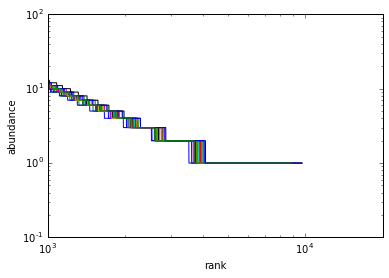

In [13]:
for i in sort_ab[:30]: 
    plt.plot(i)
plt.xlim((10**3,2*10**4))
plt.ylim((10**-1,10**2))
plt.xlabel('rank')
plt.ylabel('abundance')
plt.loglog()
plt.show()

In [14]:
len(sort_ab[0])

9098

In [15]:
sum(map(lambda x: x[:1][0],sort_ab[:3]))

10156

In [16]:
map(lambda x: x[:1][0],sort_ab[:2])

[1618, 5010]

In [17]:
print sort_ab[0][:10]
print sort_ab[1][:10]

[1618, 1502, 1404, 1372, 1072, 982, 970, 937, 904, 870]
[5010, 3632, 2712, 2106, 2080, 1430, 1251, 1223, 1130, 915]


In [161]:
min(sort_ab)[-1]

1

In [18]:
for i in xrange(10):
    #print map(lambda x: x[-1:][0],sort_ab)
    print np.var(map(lambda x: x[i:i+1],sort_ab))

585303.288416
188172.131791
97000.232775
61109.6276
38965.869159
27830.663391
21019.004896
17332.921671
14334.355279
12055.1416


In [19]:
All=map(None,*sort_ab)

In [20]:
All=[[0 if v is None else v for v in d] for d in All]

In [209]:
All[0][:10]

[1618, 5010, 3528, 3191, 2580, 1959, 2362, 2840, 1814, 1439]

In [21]:
Sums=map(sum,All)

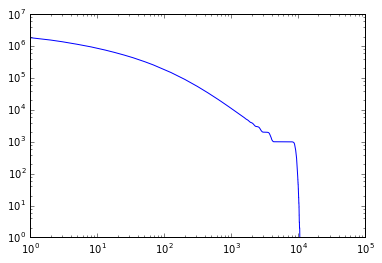

In [22]:
plt.plot(Sums);
plt.loglog()
plt.show()

In [208]:
TOT

100000000

In [23]:
TOT=sum(Sums)
fractions=map(lambda x: x/float(TOT),Sums)

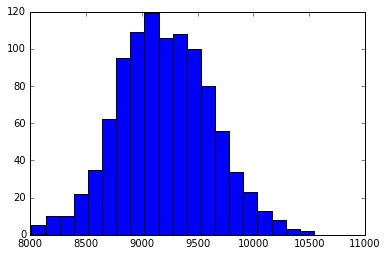

In [24]:
plt.hist([len(i) for i in sort_ab],20);

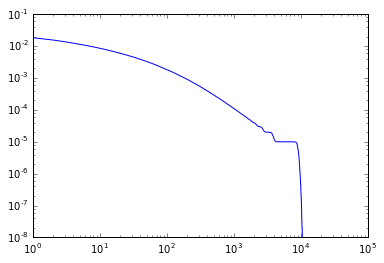

In [25]:
plt.plot(fractions);
plt.loglog()
plt.show()

In [163]:
single_txt_fact=[[ab/float(10**5) for ab in text] for text in sort_ab]

In [164]:
len(single_txt_fact[0])

9098

In [165]:
fractions[:10]

[0.02415172,
 0.01839453,
 0.01554735,
 0.0137282,
 0.01241721,
 0.01144147,
 0.01067652,
 0.01002177,
 0.00949811,
 0.0090012]

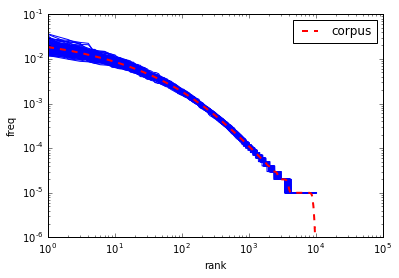

In [300]:
for i in single_txt_fact[:200]: 
    plt.plot(i,'b')
#plt.xlim((10**3,2*10**4))
plt.ylim((10**-6,10**-1))
plt.plot(fractions,'r--',linewidth=2,label='corpus')
plt.xlabel('rank')
plt.ylabel('freq')
plt.plot()
plt.loglog()
plt.legend()
plt.savefig('rankplot_CRP.png')

# Fai questo

covarianza fra parole in singolo testo data la probabilità della coppia di parole dal corpus

In [167]:
All_ferq=map(None,*single_txt_fact)

In [168]:
single_txt_fact_equal = [list(i) for i in zip(*All_ferq)]

In [169]:
single_txt_fact[0][:10]

[0.01618,
 0.01502,
 0.01404,
 0.01372,
 0.01072,
 0.00982,
 0.0097,
 0.00937,
 0.00904,
 0.0087]

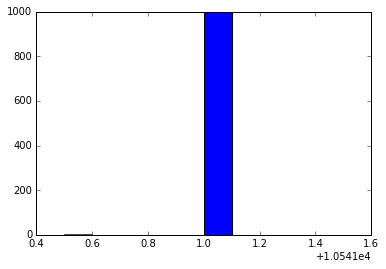

In [170]:
plt.hist([len(i) for i in single_txt_fact_equal]); #controllo lunghezza uguale

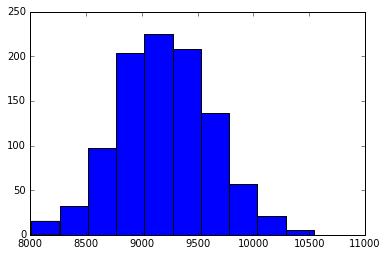

In [171]:
plt.hist([len(i) for i in single_txt_fact]);


In [172]:
single_txt_fact_equal[0][-10:]

[None, None, None, None, None, None, None, None, None, None]

In [173]:
import pandas as pd

In [174]:
df=pd.DataFrame(single_txt_fact_equal)

In [175]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,10532,10533,10534,10535,10536,10537,10538,10539,10540,10541
0,0.01618,0.01502,0.01404,0.01372,0.01072,0.00982,0.00970,0.00937,0.00904,0.00870,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.05010,0.03632,0.02712,0.02106,0.02080,0.01430,0.01251,0.01223,0.01130,0.00915,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.03528,0.02867,0.02376,0.01624,0.01181,0.01021,0.01006,0.00989,0.00904,0.00886,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.03191,0.02226,0.01728,0.01534,0.01337,0.01302,0.01019,0.00778,0.00739,0.00704,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.02580,0.01893,0.01179,0.01172,0.00971,0.00914,0.00869,0.00847,0.00822,0.00796,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [205]:
fractions[0]

0.02415172

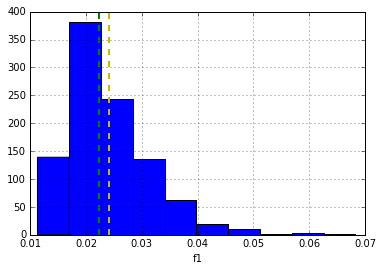

In [235]:
(df.iloc[:,0]).hist()
x_pos=(df.iloc[:,0]).mean()
med=(df.iloc[:,0]).median()
plt.axvline(x_pos,color='r', linestyle='--',linewidth=2);
plt.axvline(med,color='g', linestyle='--',linewidth=2);
plt.axvline(fractions[0],color='y', linestyle='--',linewidth=2);
plt.xlabel('f1');


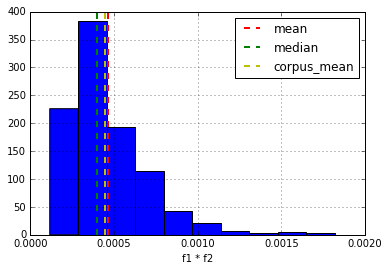

In [236]:
(df.iloc[:,0]*df.iloc[:,1]).hist()
x_pos=(df.iloc[:,0]*df.iloc[:,1]).mean()
med=(df.iloc[:,0]*df.iloc[:,1]).median()
plt.axvline(x_pos,color='r', linestyle='--',linewidth=2,label='mean');
plt.axvline(med,color='g', linestyle='--',linewidth=2,label='median');
plt.axvline(fractions[0]*fractions[1],color='y', linestyle='--',linewidth=2,label='corpus_mean');
plt.legend();
plt.xlabel('f1 * f2');


In [176]:
df.fillna(0,inplace=True)

In [177]:
df.to_csv('./heaps_cose_lenin/df_normale.csv',index=False)

In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Columns: 10542 entries, 0 to 10541
dtypes: float64(10542)
memory usage: 80.4 MB


In [179]:
print df.iloc[:,0].mean()*df.iloc[:,1].mean()
print(fractions[0]*fractions[1])

print df.iloc[:,0].mean()*df.iloc[:,1].mean()-(fractions[0]*fractions[1])

0.000444259538092
0.000444259538092
1.08420217249e-19


In [39]:
from itertools import combinations
import sys

In [180]:
covs=[]
counter=0
top_n=10**3
TOtal=binom(top_n,2)
print 'Total combinations',TOtal
for i in combinations(df.columns[:top_n],2):
    covs.append((df.iloc[:,i[0]]*df.iloc[:,i[1]]).mean()-(fractions[i[0]]*fractions[i[1]]))
    if counter%int(TOtal/100)==0:
        stri='Doing '+str(counter/TOtal*100)+' %'
        #print counter, TOtal
        sys.stdout.write('\r'+stri )   
    counter+=1

Total combinations 499500.0
Doing 99.0 %

In [181]:
len(covs)

499500

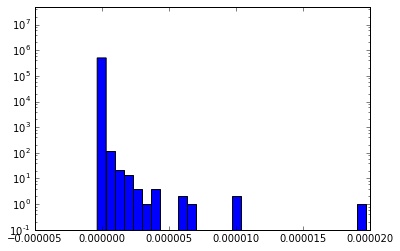

In [182]:
plt.hist(covs,30);
plt.yscale('log')
plt.ylim((10**-1,.5*10**8));

In [195]:
max(covs),min(covs)

(1.9718252808400031e-05, -3.5166620440000641e-07)

In [44]:
fractions[:10]

[0.02415172,
 0.01839453,
 0.01554735,
 0.0137282,
 0.01241721,
 0.01144147,
 0.01067652,
 0.01002177,
 0.00949811,
 0.0090012]

In [45]:
sum(fractions)

0.9999999999998485

In [434]:
random_df=pd.DataFrame()

In [57]:
def give_dic(traj):
    tmp={}
    for i in traj:
        try:
            tmp[i]+=1
        except KeyError:
            tmp[i]=1            
    return tmp

In [436]:
for i in xrange(10**4):
    random_df=random_df.append(give_dic(np.random.choice(range(len(fractions)),10**5,p=fractions)),ignore_index=True)

In [437]:
random_df.head()

,0,1,2,3,4,5,6,7,8,9,...,10532,10495,10538,10485,10539,10500,10522,10493,10509,10519
0,2423.0,1852.0,1608.0,1408.0,1235.0,1138.0,1068.0,989.0,952.0,839.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2394.0,1880.0,1513.0,1391.0,1280.0,1208.0,1047.0,941.0,970.0,939.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2449.0,1815.0,1567.0,1375.0,1186.0,1075.0,1101.0,1009.0,971.0,881.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2507.0,1860.0,1504.0,1346.0,1221.0,1112.0,1117.0,1027.0,950.0,966.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2381.0,1784.0,1584.0,1421.0,1322.0,1130.0,1052.0,1038.0,966.0,896.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [454]:
random_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 10542 entries, 0 to 10519
dtypes: float64(10542)
memory usage: 804.3 MB


In [438]:
random_df=random_df.applymap(lambda x: x/float(10**5))

In [459]:
random_df.head()

,0,1,2,3,4,5,6,7,8,9,...,10532,10495,10538,10485,10539,10500,10522,10493,10509,10519
0,0.02423,0.01852,0.01608,0.01408,0.01235,0.01138,0.01068,0.00989,0.00952,0.00839,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.02394,0.01880,0.01513,0.01391,0.01280,0.01208,0.01047,0.00941,0.00970,0.00939,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.02449,0.01815,0.01567,0.01375,0.01186,0.01075,0.01101,0.01009,0.00971,0.00881,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.02507,0.01860,0.01504,0.01346,0.01221,0.01112,0.01117,0.01027,0.00950,0.00966,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.02381,0.01784,0.01584,0.01421,0.01322,0.01130,0.01052,0.01038,0.00966,0.00896,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [460]:
random_df.to_csv('./random_df.csv',index=False)

In [46]:
random_df=pd.read_csv('./heaps_cose_lenin/random_df.csv')

In [277]:
random_df.fillna(0,inplace=True)

In [47]:
random_df.head()

,0,1,2,3,4,5,6,7,8,9,...,10532,10495,10538,10485,10539,10500,10522,10493,10509,10519
0,0.02423,0.01852,0.01608,0.01408,0.01235,0.01138,0.01068,0.00989,0.00952,0.00839,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.02394,0.01880,0.01513,0.01391,0.01280,0.01208,0.01047,0.00941,0.00970,0.00939,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.02449,0.01815,0.01567,0.01375,0.01186,0.01075,0.01101,0.01009,0.00971,0.00881,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.02507,0.01860,0.01504,0.01346,0.01221,0.01112,0.01117,0.01027,0.00950,0.00966,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.02381,0.01784,0.01584,0.01421,0.01322,0.01130,0.01052,0.01038,0.00966,0.00896,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


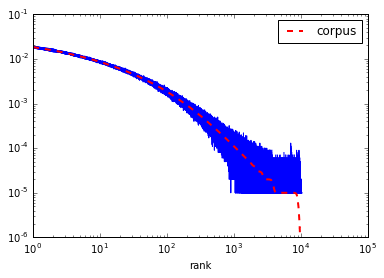

In [301]:
for i in xrange(100):
    plt.plot(list(random_df.iloc[i,:]),'b');
plt.plot(fractions,'r--',linewidth=2,label='corpus');
plt.loglog();
plt.ylim((10**-6,10**-1))
plt.legend()
plt.xlabel('rank')
plt.savefig('rankplot_RS.png')

In [48]:
random_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 10542 entries, 0 to 10519
dtypes: float64(10542)
memory usage: 804.3 MB


In [280]:
covs_rand=[]
counter=0
top_n=1000
TOtal=binom(top_n,2)
print 'Total combinations',TOtal
for i in combinations(random_df.columns[:top_n],2):
    covs_rand.append((random_df.iloc[:,int(i[0])]*random_df.iloc[:,int(i[1])]).mean()-(fractions[int(i[0])]*fractions[int(i[1])]))
    if counter%int(TOtal/100)==0:
        stri='Doing '+str(counter/TOtal*100)+' %'
        #print counter, TOtal
        sys.stdout.write('\r'+stri )   
    counter+=1

Total combinations 499500.0
Doing 99.0 %

In [64]:
len(covs)

49995000

In [188]:
rangez=(0,0.00006)

In [281]:
from scipy.stats import ks_2samp

In [282]:
ks_2samp(covs,covs_rand)

Ks_2sampResult(statistic=0.41706306306306307, pvalue=0.0)

In [283]:
len(covs),len(covs_rand)

(499500, 499500)

In [294]:
sbrange=(-8*10**-7,2*10**-5)

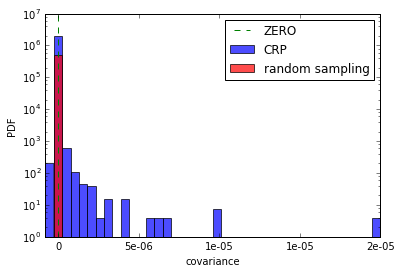

In [296]:
plt.hist(covs,40,range=sbrange,label='CRP',alpha=0.7,normed=True);
plt.hist(covs_rand,40,range=sbrange,color='red',label='random sampling',alpha=0.7);

plt.yscale('log')
#plt.ylim((10**-1,.5*10**9));
plt.xlim(sbrange)
plt.xlabel('covariance');
plt.ylabel('PDF');
plt.axvline(0,color='g', linestyle='--',linewidth=1,label='ZERO');

plt.legend(loc='best');
ax = plt.gca()
ax.get_xaxis().set_major_formatter(plt.LogFormatter(10,  labelOnlyBase=False))

plt.savefig('./iinset.png')

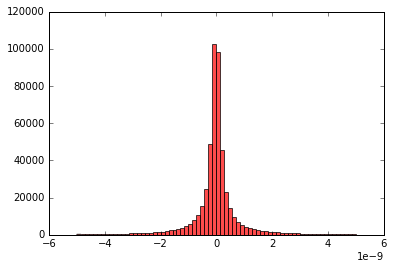

In [289]:
plt.hist(covs_rand,70,color='red',label='random sampling',alpha=0.7,range=(-0.5*10**-8,0.5*10**-8));


In [256]:
min(covs_rand),max(covs_rand)

(-1.8338098129998281e-07, 1.0350145948717947e-06)

In [193]:
min(covs),max(covs)

(-3.5166620440000641e-07, 1.9718252808400031e-05)

# Alto rango vs basso rango

In [81]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,10532,10533,10534,10535,10536,10537,10538,10539,10540,10541
0,0.177841,0.165091,0.154320,0.150802,0.117828,0.107936,0.106617,0.102990,0.099362,0.095625,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.571135,0.414045,0.309166,0.240082,0.237118,0.163019,0.142613,0.139421,0.128819,0.104309,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.386291,0.313917,0.260155,0.177817,0.129311,0.111792,0.110150,0.108289,0.098982,0.097011,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.336639,0.234835,0.182298,0.161831,0.141049,0.137356,0.107501,0.082076,0.077962,0.074269,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.281260,0.206367,0.128529,0.127766,0.105854,0.099640,0.094735,0.092336,0.089611,0.086776,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [82]:
random_df.head()

,0,1,2,3,4,5,6,7,8,9,...,10532,10495,10538,10485,10539,10500,10522,10493,10509,10519
0,0.02423,0.01852,0.01608,0.01408,0.01235,0.01138,0.01068,0.00989,0.00952,0.00839,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.02394,0.01880,0.01513,0.01391,0.01280,0.01208,0.01047,0.00941,0.00970,0.00939,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.02449,0.01815,0.01567,0.01375,0.01186,0.01075,0.01101,0.01009,0.00971,0.00881,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.02507,0.01860,0.01504,0.01346,0.01221,0.01112,0.01117,0.01027,0.00950,0.00966,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.02381,0.01784,0.01584,0.01421,0.01322,0.01130,0.01052,0.01038,0.00966,0.00896,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [314]:
sambles=list(df.columns[:5])+list(df.columns[-1000:])

In [315]:
covs_samp=[]
counter=0
TOtal=binom(len(sambles),2)
            
print 'Total combinations',TOtal
            
for i in combinations(sambles,2):
    covs_samp.append((df.iloc[:,i[0]]*df.iloc[:,i[1]]).mean()-(fractions[i[0]]*fractions[i[1]]))
    if counter%int(TOtal/100)==0:
        stri='Doing '+str(counter/TOtal*100)+' %'
        #print counter, TOtal
        sys.stdout.write('\r'+stri )   
    counter+=1

Total combinations 504510.0
Doing 99.9980178787 %%

In [316]:
min(covs_samp),max(covs_samp)

(-6.2865648000000022e-09, 1.9718252808400031e-05)

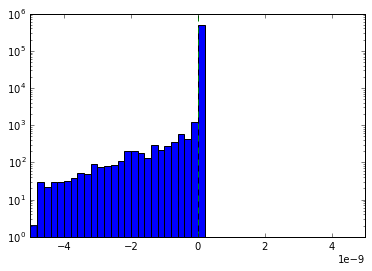

In [324]:
plt.hist(covs_samp,range=(-0.5*10**-8,0.5*10**-8),bins=50);
plt.axvline(0,color='g', linestyle='--',linewidth=1,label='ZERO');
plt.xlim((-0.5*10**-8,0.5*10**-8))
plt.yscale('log')